In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('/creditcard.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


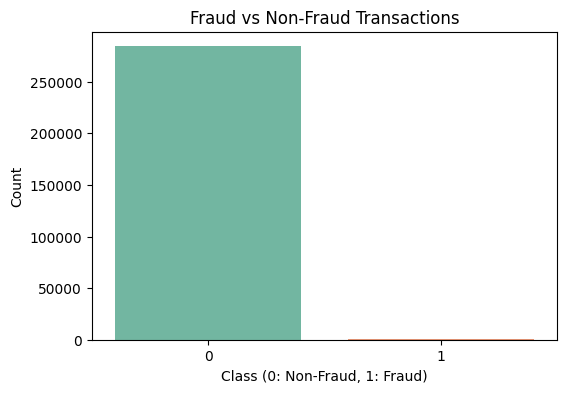

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Class', palette='Set2')
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

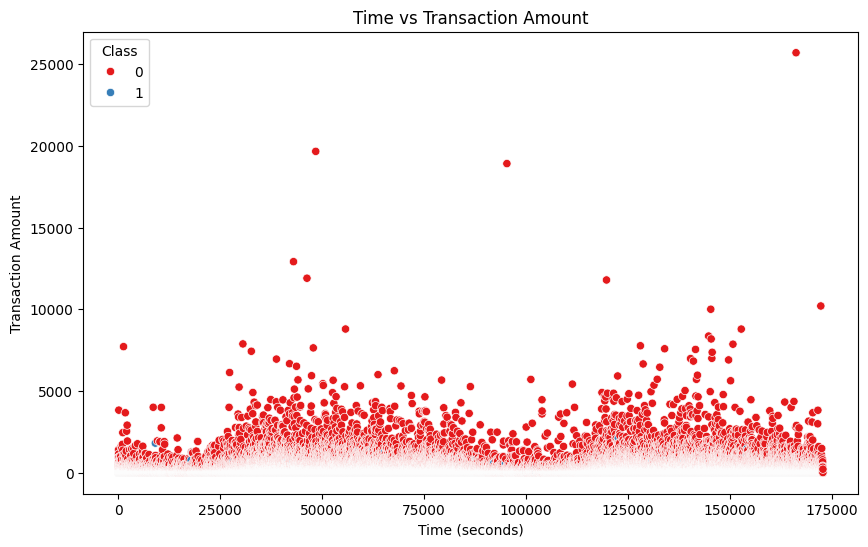

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Time', y='Amount', hue='Class', palette='Set1')
plt.title('Time vs Transaction Amount')
plt.xlabel('Time (seconds)')
plt.ylabel('Transaction Amount')
plt.show()

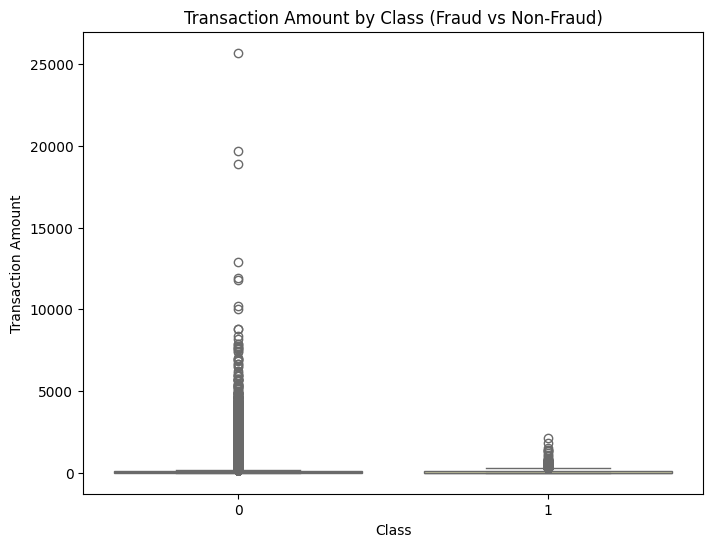

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount', palette='Set3')
plt.title('Transaction Amount by Class (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

In [14]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [15]:
legit = data[data.Class == 0]
fraud = data[data.Class == 1]


In [16]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [17]:
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [18]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [19]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [20]:
legit_sample = legit.sample(n=492)

In [21]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
188209,127868.0,-0.238047,0.155513,0.852928,-1.213525,-0.027606,-0.681579,0.558041,-0.183749,-1.091844,...,-0.199151,0.087607,-0.213278,0.023498,-0.131864,0.598722,0.107957,0.144043,16.09,0
29814,35641.0,-0.906365,0.103318,1.244399,0.676516,1.485228,0.205018,0.084021,0.107232,-0.887351,...,-0.111590,-0.508704,-0.105506,-1.266975,0.185235,0.675580,0.024479,0.080677,33.00,0
263713,161079.0,1.926408,-0.528805,0.033172,0.263839,-0.695747,0.373967,-1.011018,0.270199,1.063368,...,0.060409,0.327667,0.346919,0.740825,-0.571413,0.304651,-0.003582,-0.039128,6.99,0
207839,136852.0,-0.234206,1.211121,-0.906508,-0.705751,0.858590,-0.257751,0.537349,0.496650,-0.490469,...,-0.257364,-0.758153,0.119518,0.121496,-0.381983,0.123678,0.094210,0.008193,12.98,0
10277,16163.0,-0.385372,1.085612,1.562856,1.498063,0.118136,0.075954,0.405556,0.118658,1.233174,...,-0.209653,-0.046630,-0.141007,-0.010906,-0.170470,-0.256333,0.395459,0.193604,2.49,0


In [23]:
new_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88641.871951,-2.299227,1.766671,-3.556226,2.258327,-1.591545,-0.654824,-2.795790,0.319875,-1.273037,...,0.351544,0.006514,-0.014673,-0.055500,0.018880,0.010397,0.075908,0.040356,108.088222,0.500000
std,49013.574062,5.541062,3.708760,6.192042,3.184023,4.203957,1.780289,5.851434,4.849731,2.324410,...,2.781180,1.167310,1.214314,0.574412,0.670152,0.470791,1.021915,0.424662,266.263592,0.500254
min,141.000000,-30.552380,-16.077207,-31.103685,-3.552197,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.178171,-4.781606,-1.246418,-7.263482,-1.869290,0.000000,0.000000
25%,46118.500000,-2.788129,-0.238564,-5.090692,-0.066692,-1.801604,-1.536701,-3.060742,-0.202834,-2.279453,...,-0.167473,-0.538158,-0.239909,-0.400890,-0.306473,-0.305346,-0.062916,-0.058085,1.290000,0.000000
50%,82519.000000,-0.678436,0.918963,-1.478910,1.255576,-0.463778,-0.643164,-0.703872,0.161660,-0.712571,...,0.149032,0.018887,-0.035412,0.013287,0.061211,-0.042653,0.045934,0.034446,19.740000,0.500000
75%,136659.000000,1.118388,2.777569,0.322550,4.235631,0.500303,0.125651,0.259309,0.879078,0.215741,...,0.651412,0.598359,0.188485,0.365916,0.388699,0.306403,0.425509,0.211970,99.990000,1.000000
max,171773.000000,2.329675,22.057729,3.189875,12.114672,11.095089,6.474115,13.875528,20.007208,5.805163,...,27.202839,8.361985,11.677395,1.133359,2.208209,2.745261,3.052358,2.105793,4633.950000,1.000000


In [24]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [25]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96536.936992,0.173494,-0.090437,-0.079171,-0.025375,-0.031865,0.088089,-0.022850,0.069114,0.035049,...,0.006046,-0.010501,-0.001021,0.010962,-0.005869,-0.003690,-0.030854,-0.018759,0.005045,93.965122
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
188209,127868.0,-0.238047,0.155513,0.852928,-1.213525,-0.027606,-0.681579,0.558041,-0.183749,-1.091844,...,-0.518821,-0.199151,0.087607,-0.213278,0.023498,-0.131864,0.598722,0.107957,0.144043,16.09
29814,35641.0,-0.906365,0.103318,1.244399,0.676516,1.485228,0.205018,0.084021,0.107232,-0.887351,...,0.570331,-0.111590,-0.508704,-0.105506,-1.266975,0.185235,0.675580,0.024479,0.080677,33.00
263713,161079.0,1.926408,-0.528805,0.033172,0.263839,-0.695747,0.373967,-1.011018,0.270199,1.063368,...,-0.121145,0.060409,0.327667,0.346919,0.740825,-0.571413,0.304651,-0.003582,-0.039128,6.99
207839,136852.0,-0.234206,1.211121,-0.906508,-0.705751,0.858590,-0.257751,0.537349,0.496650,-0.490469,...,-0.038669,-0.257364,-0.758153,0.119518,0.121496,-0.381983,0.123678,0.094210,0.008193,12.98
10277,16163.0,-0.385372,1.085612,1.562856,1.498063,0.118136,0.075954,0.405556,0.118658,1.233174,...,-0.031157,-0.209653,-0.046630,-0.141007,-0.010906,-0.170470,-0.256333,0.395459,0.193604,2.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [28]:
Y

,Class
188209,0
29814,0
263713,0
207839,0
10277,0
...,...
279863,1
280143,1
280149,1
281144,1


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train, Y_train)

LogisticRegression()

In [33]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264
